> ##                                              Homework #3 Machine Leaning CS722/822
>  Apurva Modi UIN: 01122493

In [1]:
#from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> ###   Question 1

$$LL(W)=\sum_{i=1}^{N}\log(1+\exp(wx_i^T)) - y_iwx_i^T$$
Take derivative with respect to w, $$\frac{\partial LL(w)}{\partial w}$$ and then we can get the gradient as
$$\sum_{i=1}^{N} \frac{e^{wx_i^T}}{1+e^{wx_i^T}}x_i - y_ix_i$$ 

In [2]:
# Implemeting the sigmoid function
def sigmoid(scores):
    """
    return e^x/(1+e^x)
    """
    return 1 / (1 + np.exp(-scores))

> ### Question 2

In [3]:
# Function to check the logisgtic loss
def log_likelihood(features, target, weights):
    """
    This is LL(W) function to check how well the gradient descent will be 
    features X.T Traget Y and weights = w
    """
    scores = np.dot(features, weights)
    ll = np.sum(np.log(1 + np.exp(scores))-target*scores )
    return ll

In [4]:
def logistic_regression(features, target, num_steps,learning_rate):
    """
    use logitstic regression to calculate weight and eventually use weight we got 
    to predict test target using wx linear function.
    """    
    weights = np.zeros(features.shape[1])
    #learning_rate=1
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        #learning_rate=learning_rate/2
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
        
    return weights

> ### Question 3

In [5]:
def roc_table(probability, target):
    """
    get roc table we can input probability and target we need to evaluate
    """
    df = pd.DataFrame({ 'True Class':target ,'probability':probability})
    df=df.sort_values('probability',ascending=False)
    threshold=df.probability.unique().tolist()
    tp=[]
    fp=[]
    tn=[]
    fn=[]
    for i in threshold:
        tp.append(np.in1d(df.loc[lambda df: df.probability >= i, :],1).sum())
        fp.append(np.in1d(df.loc[lambda df: df.probability >= i, :],0).sum())
        tn.append(np.in1d(df.loc[lambda df: df.probability < i, :],0).sum())
        fn.append(np.in1d(df.loc[lambda df: df.probability < i, :],1).sum())
    roc=pd.DataFrame({ 'threshold':threshold ,'tp':tp,'fp':fp,'tn':tn,'fn':fn})
    roc['tpr']=roc['tp']/(roc['tp']+roc['fn'])
    roc['fpr']=roc['fp']/(roc['fp']+roc['tn'])
    return roc

In [6]:
def roc_curve(roc):
    """
    drawing the roc curve
    """
    plt.title('ROC Curve')
    plt.plot(roc.fpr, roc.tpr, 'b')
    plt.legend()
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate (TPR)')
    plt.xlabel('False Positive Rate (FPR)')
    plt.show()
    return
 

> ### Question 4

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


724831.0951532755


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


inf
the weights w is 
 [ 3.99047289e+01 -3.51485738e+01  1.60452745e+02  8.95007088e+00
 -1.98091604e-01 -2.25353862e+00 -3.95753020e+00 -1.46707651e+00
 -9.56592257e-02  2.24258617e-02  6.10527098e-01 -1.90454500e+00
 -6.77567847e+00 -3.39620734e+01 -5.18983504e-02 -5.30193024e-01
 -8.47360864e-01 -1.87427504e-01 -3.83135385e-02 -4.50414996e-02
  4.14385830e+01 -9.57147126e+01  8.33390262e+01 -3.48654750e+01
 -6.03156886e-01 -8.13686851e+00 -1.14708034e+01 -2.77088832e+00
 -1.27947013e+00 -6.64415797e-01]
ROC table 
         threshold   tp   fp   tn  fn       tpr       fpr
0    1.000000e+00  215    3  132  19  0.918803  0.022222
1    1.000000e+00  216    3  132  18  0.923077  0.022222
2    2.130133e-01  217    3  132  17  0.927350  0.022222
3    1.182762e-22  218    3  132  16  0.931624  0.022222
4    2.781731e-44  219    3  132  15  0.935897  0.022222
5    3.883070e-75  220    3  132  14  0.940171  0.022222
6    1.186168e-99  221    3  132  13  0.944444  0.022222
7   6.192826e-107  2

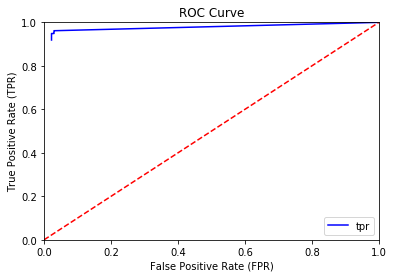

In [7]:
# Loading the breast cancer dataset 
dataset = datasets.load_breast_cancer()

X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 2/3, random_state=10)
weights=logistic_regression(X_train, y_train,20000,10e-5)
print('the weights w is \n',weights) 
p=sigmoid(np.dot(X_test,weights))
roc=roc_table(p,y_test)
print('ROC table \n',roc)
roc_curve(roc)